In [1]:
# First check whether data format is correct

key_list = ['author', 'title', 'year', 'Conference']
for line in open('./dataset/FilteredDBLP.txt', 'r', encoding='utf-8'):
    line = line.strip('\n')
    if len(line) <= 0:
        continue
    if line != '#########':
        word_list = line.split('\t')
        if len(word_list) != 2:
            print('Strange line: %s' % line)
        else:
            if word_list[0] not in key_list:
                print('Strange key: %s in %s' % (word_list[0], line))

In [1]:
from dblp import DBLP, DBLPAuthorList
dataset = DBLP('./dataset/FilteredDBLP.txt')
author_list = DBLPAuthorList(dataset)

In [2]:
# 找出某个会议的研究者
# 以CVPR为例
author_list.get_by_conference('CVPR')

{2007: ['Mayumi Yuasa',
  'Tomokazu Wakasugi',
  'Lech Szumilas',
  'Rene Donner',
  'Helen M. Meng',
  'Vincent Cheung',
  'Suneel Suresh',
  'Andy Tsai',
  'Alfred O. Hero III',
  'Niranjan Damera-Venkata',
  'Zhen Wen',
  'Mika Fischer',
  'Qin Jin',
  'Wai Han Ho',
  'Paul Andrew Watters',
  'Dominic Verity',
  'Luminita A. Vese',
  'Arnaud Declercq',
  'Justus H. Piater',
  'Jeff Houser',
  'Lei Zong',
  'Martin Habbecke',
  'Rebecca Book',
  'Carl Adrian',
  'Phil Williams',
  'Christoph Munkelt',
  'Ingo Schmidt',
  'Christian Bräuer-Burchardt',
  'Peter Kühmstedt',
  'Gunther Notni',
  'José Alonso Ybáñez Zepeda',
  'Franck Davoine',
  'Maurice Charbit',
  'Yi Ding',
  'Rong Wang',
  'Jana Kostlivá',
  'Radim Sára',
  'Gehua Yang',
  'Alex Po Leung',
  'MinYi Jeong',
  'Jeung-Yoon Choi',
  'Tsuyoshi Moriyama',
  'Yun Lin',
  'W. Brent Seales',
  'Mia K. Markey',
  'Alan C. Bovik',
  'Chiu-Yen Kao',
  'Kuang-chih Lee',
  'Salih Burak Göktürk',
  'Baris Sumengen',
  'Fatih Kahram

In [3]:
# 找出CVPR中已经不活跃的（也就是最后一次发论文的时间在2013年之前（包括2013年））

author_list.get_before_year('CVPR', 2013)

{2007: ['Mayumi Yuasa',
  'Tomokazu Wakasugi',
  'Lech Szumilas',
  'Rene Donner',
  'Helen M. Meng',
  'Vincent Cheung',
  'Suneel Suresh',
  'Andy Tsai',
  'Alfred O. Hero III',
  'Niranjan Damera-Venkata',
  'Zhen Wen',
  'Mika Fischer',
  'Qin Jin',
  'Wai Han Ho',
  'Paul Andrew Watters',
  'Dominic Verity',
  'Luminita A. Vese',
  'Arnaud Declercq',
  'Justus H. Piater',
  'Jeff Houser',
  'Lei Zong',
  'Martin Habbecke',
  'Rebecca Book',
  'Carl Adrian',
  'Phil Williams',
  'Christoph Munkelt',
  'Ingo Schmidt',
  'Christian Bräuer-Burchardt',
  'Peter Kühmstedt',
  'Gunther Notni',
  'José Alonso Ybáñez Zepeda',
  'Franck Davoine',
  'Maurice Charbit',
  'Yi Ding',
  'Rong Wang',
  'Jana Kostlivá',
  'Radim Sára',
  'Gehua Yang',
  'Alex Po Leung',
  'MinYi Jeong',
  'Jeung-Yoon Choi',
  'Tsuyoshi Moriyama',
  'Yun Lin',
  'W. Brent Seales',
  'Mia K. Markey',
  'Alan C. Bovik',
  'Chiu-Yen Kao',
  'Kuang-chih Lee',
  'Salih Burak Göktürk',
  'Baris Sumengen',
  'Fatih Kahram

In [4]:
# 找出CVPR中仍在活跃的（也就是最后一次发论文的时间在2014年之后（包括2014年））

author_list.get_after_year('CVPR', 2014)

{2014: ['Armand Joulin',
  'Enrique G. Ortiz',
  'Sanath Narayan',
  'Mohan S. Kankanhalli',
  'Kalpathi Ramakrishnan',
  'Wei Li ',
  'Richard V. Stebbing',
  'Olof Enqvist',
  'Michele Fenzi',
  'Jungseock Joo',
  'Jakob J. Verbeek',
  'Alfredo Petrosino',
  'Gady Agam',
  'Yin Zhou',
  'Hang Chang',
  'Kenneth E. Barner',
  'Paul T. Spellman',
  'Bahram Parvin',
  'Uwe Schmidt ',
  'Mayank Bansal',
  'Irfan A. Essa',
  'Luwen Huangfu',
  'Xiaohong Zhang',
  'Yi Hong',
  'Wenze Hu',
  'Jiajun Bu',
  'Jiaguang Sun',
  'Thomas Mueller',
  'Marco F. Huber',
  'James W. Davis',
  'Yang Wang ',
  'Xiaodong Wu',
  'Zhengying Chen',
  'Tingting Jiang',
  'Yoshiyuki Kawano',
  'Keiji Yanai',
  'Jinwei Ye',
  'Vittal Premachandran',
  'Ang Liu',
  'Zexiang Li',
  'Iason Oikonomidis',
  'Manolis I. A. Lourakis',
  'Haifeng Liu',
  'Kalin Kolev',
  'Petri Tanskanen',
  'Yannick Benezeth',
  'Chenyang Zhang',
  'Angela Eigenstetter',
  'Yu Cao',
  'Andrei Barbu',
  'Jeffrey Mark Siskind',
  'Ten

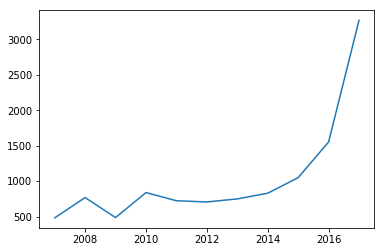

In [5]:
# CVPR按照最后一篇论文发表时间的研究者分布

import matplotlib.pyplot as plt

cvpr = author_list.get_by_conference('CVPR')
author_count = []
year = range(2007, 2018)
for i in year:
    author_count.append(len(cvpr[i]))
plt.plot(year, author_count, label='Count')
plt.show()

In [6]:
# 按照定义，不活跃的研究者和活跃的研究者的占比

inactive = 0
for i in range(2007, 2014):
    inactive += len(cvpr[i])
active = 0
for i in range(2014, 2018):
    active += len(cvpr[i])
print("Active: %s" % active)
print("Inactive: %s" % inactive)

Active: 6698
Inactive: 4758


In [7]:
# 用FPGrowth算法计算频繁项集

from fp_growth import FPGrowth
fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(), min_support=3, min_size=3)
fp_growth.print()

['Lei Wang ', 'Xinwang Liu', 'En Zhu'] 3
['Lei Wang ', 'Yong Dou', 'En Zhu'] 3
['Lei Wang ', 'Xinwang Liu', 'Yong Dou', 'En Zhu'] 3
['Lei Wang ', 'Jianping Yin', 'En Zhu'] 3
['Lei Wang ', 'Xinwang Liu', 'Jianping Yin', 'En Zhu'] 3
['Lei Wang ', 'Yong Dou', 'Jianping Yin', 'En Zhu'] 3
['Lei Wang ', 'Xinwang Liu', 'Yong Dou', 'Jianping Yin', 'En Zhu'] 3
['Sheila A. McIlraith', 'Jorge A. Baier', 'Shirin Sohrabi'] 3
['Shirin Sohrabi', 'Octavian Udrea', 'Anton V. Riabov'] 3
['Milind Tambe', 'Albert Xin Jiang', 'Leandro Soriano Marcolino'] 3
['Sarit Kraus', 'Zinovi Rabinovich', 'Claudia V. Goldman'] 3
['Amos Azaria', 'Zinovi Rabinovich', 'Claudia V. Goldman'] 3
['Sarit Kraus', 'Amos Azaria', 'Zinovi Rabinovich', 'Claudia V. Goldman'] 3
['Sarit Kraus', 'Claudia V. Goldman', "Ya'akov Gal"] 3
['Amos Azaria', 'Claudia V. Goldman', "Ya'akov Gal"] 3
['Sarit Kraus', 'Amos Azaria', 'Claudia V. Goldman', "Ya'akov Gal"] 3
['Shlomo Zilberstein', 'Feng Wu', 'Xiaoping Chen'] 3
['Fei Wang ', 'Jun Wang', '

In [12]:
# 根据Group的定义，将频繁项集组合成Group

from dblp import DBLPAuthorPaper, DBLPGroup

author_group = DBLPAuthorPaper(dataset)
group = DBLPGroup(fp_growth.items, author_group)
print(len(group.groups))

1001


In [8]:
# LDA模型训练，主题数为30

from dblp import DBLP
from lda import LdaModel

TOPIC_NUM = 30

dataset = DBLP('./dataset/FilteredDBLP.txt')
topic_model = LdaModel()
topic_model.fit(dataset.get_title_list(), num_topics=TOPIC_NUM)

In [9]:
# 所有的主题

topic_model.model.print_topics(TOPIC_NUM)

[(0,
  '0.092*"plan" + 0.072*"constraint" + 0.059*"game" + 0.056*"agent" + 0.053*"multi" + 0.031*"class" + 0.028*"new" + 0.025*"strategi" + 0.023*"gener" + 0.020*"complex"'),
 (1,
  '0.078*"adapt" + 0.068*"label" + 0.060*"domain" + 0.055*"recommend" + 0.039*"filter" + 0.038*"high" + 0.037*"context" + 0.037*"multi" + 0.031*"awar" + 0.030*"dimension"'),
 (2,
  '0.093*"learn" + 0.065*"supervis" + 0.056*"scene" + 0.054*"view" + 0.048*"discrimin" + 0.043*"languag" + 0.042*"reconstruct" + 0.041*"machin" + 0.039*"semi" + 0.029*"stereo"'),
 (3,
  '0.072*"person" + 0.069*"camera" + 0.068*"toward" + 0.031*"attent" + 0.028*"model" + 0.027*"fusion" + 0.026*"base" + 0.024*"part" + 0.024*"feedback" + 0.024*"qualiti"'),
 (4,
  '0.156*"featur" + 0.078*"select" + 0.050*"embed" + 0.042*"base" + 0.037*"similar" + 0.034*"sequenc" + 0.031*"argument" + 0.029*"boost" + 0.027*"stream" + 0.024*"rate"'),
 (5,
  '0.228*"network" + 0.091*"neural" + 0.049*"social" + 0.046*"convolut" + 0.039*"set" + 0.028*"partial"

In [13]:
# 尝试预测一个标题

result = topic_model.predict('Understanding Behaviors that Lead to Purchasing: A Case Study of Pinterest.')

In [14]:
print(result.prob_list)
result.topic_list

[(2, 0.12916666), (9, 0.12916668), (14, 0.12916666), (18, 0.12916666), (26, 0.37916666)]


['0.093*"learn" + 0.065*"supervis" + 0.056*"scene" + 0.054*"view" + 0.048*"discrimin" + 0.043*"languag" + 0.042*"reconstruct" + 0.041*"machin" + 0.039*"semi" + 0.029*"stereo"',
 '0.051*"extract" + 0.049*"event" + 0.045*"word" + 0.039*"model" + 0.037*"exploit" + 0.036*"discoveri" + 0.027*"correspond" + 0.025*"relev" + 0.024*"appear" + 0.024*"beyond"',
 '0.040*"preserv" + 0.037*"correl" + 0.033*"heurist" + 0.028*"manag" + 0.028*"count" + 0.021*"symmetri" + 0.021*"simpl" + 0.020*"search" + 0.019*"privaci" + 0.018*"cooper"',
 '0.067*"dynam" + 0.058*"human" + 0.052*"interact" + 0.045*"decis" + 0.038*"robot" + 0.034*"system" + 0.028*"behavior" + 0.027*"user" + 0.026*"model" + 0.023*"predict"',
 '0.107*"graph" + 0.083*"rank" + 0.046*"regular" + 0.038*"low" + 0.033*"bound" + 0.032*"project" + 0.030*"tensor" + 0.025*"studi" + 0.023*"bandit" + 0.023*"base"']

In [5]:
from dblp import DBLPAuthorPaper
from fp_growth import FPGrowth

fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(), min_support=3, min_size=3)

author_group = DBLPAuthorPaper(dataset)

In [16]:
# 统计团队发表的论文和论文涉及的主题

group = DBLPGroup(fp_growth.items, author_group, topic_model)
with open('result_1.txt', 'w', encoding='utf-8') as f:
    for i in group.get_group_member():
        f.write(str(i) + '\n')
with open('result_2.txt', 'w', encoding='utf-8') as f:
    for i in group.groups:
        f.write(str(i) + '\n')

In [21]:
# 按照2007-2012以及2013-2017两个时间段，分析两个时间段团队的相似度

fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(start_year=2007, end_year=2012), min_support=3, min_size=3)
author_group = DBLPAuthorPaper(dataset, start_year=2007, end_year=2012)
group = DBLPGroup(fp_growth.items, author_group, topic_model)

fp_growth_1 = FPGrowth()
fp_growth_1.fit(dataset.get_author_group_list(start_year=2013, end_year=2017), min_support=3, min_size=3)
author_group_1 = DBLPAuthorPaper(dataset, start_year=2013, end_year=2017)
group_1 = DBLPGroup(fp_growth_1.items, author_group_1, topic_model)

for g in group.groups:
    g_1, similarity = g.find_similar_group(group_1)
    if g_1 is not None:
        print(g)
        print(g_1)
        print('Similarity: ' + str(similarity))

Group Member: ['Wen Gao ', 'Xilin Chen', 'Shiguang Shan', 'Yu Su']
Papers: {
	Adaptive generic learning for face recognition from a single sample per person. : 2010
	Maximizing intra-individual correlations for face recognition across pose differences. : 2009
	Sigma Set: A small second order statistical region descriptor. : 2009
	Granularity-tunable gradients partition (GGP) descriptors for human detection. : 2009
	Manifold-Manifold Distance with application to face recognition based on image set. : 2008
	Unified Principal Component Analysis with generalized Covariance Matrix for face recognition. : 2008
	Locally Assembled Binary (LAB) feature with feature-centric cascade for fast and accurate face detection. : 2008
	A robust descriptor based on Weber's Law. : 2008
	Classifiability-based Optimal Discriminatory Projection Pursuit. : 2008
	Matrix-Structural Learning (MSL) of Cascaded Classifier from Enormous Training Set. : 2007
}
Topics: {
	17 : 1.65842
	13 : 0.755761
	5 : 0.688225
	21 